In [1]:
import pandas as pd

In [2]:
import numpy as np

In [44]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [5]:
%matplotlib inline

In [7]:
df=pd.read_csv('housing.csv')

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# ocean proximity

In [18]:
op=df.groupby('ocean_proximity').describe()['median_house_value']

In [23]:
op

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9136.0,240084.285464,106124.292213,17500.0,164100.0,214850.0,289100.0,500001.0
INLAND,6551.0,124805.392001,70007.908494,14999.0,77500.0,108500.0,148950.0,500001.0
ISLAND,5.0,380440.000000,80559.561816,287500.0,300000.0,414700.0,450000.0,450000.0
NEAR BAY,2290.0,259212.311790,122818.537064,22500.0,162500.0,233800.0,345700.0,500001.0
NEAR OCEAN,2658.0,249433.977427,122477.145927,22500.0,150000.0,229450.0,322750.0,500001.0


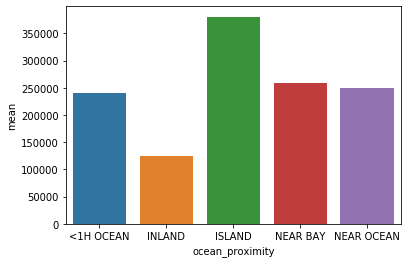

In [19]:
sns.barplot(x=op.index, y='mean',data=df.groupby('ocean_proximity').describe()['median_house_value'])

In [27]:
df.groupby('ocean_proximity').describe()['population']

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9136.0,1520.290499,1185.848357,3.0,857.75,1247.0,1848.0,35682.0
INLAND,6551.0,1391.046252,1168.670126,5.0,722.00,1124.0,1687.0,16305.0
ISLAND,5.0,668.000000,301.691067,341.0,422.00,733.0,744.0,1100.0
NEAR BAY,2290.0,1230.317467,885.899035,8.0,718.25,1033.5,1495.0,8276.0
NEAR OCEAN,2658.0,1354.008653,1005.563166,8.0,778.50,1136.5,1628.0,12873.0


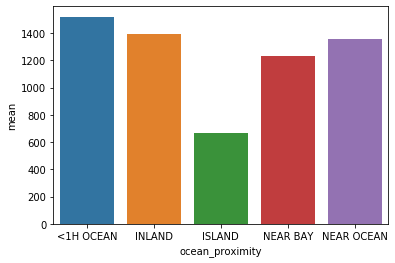

In [22]:
sns.barplot(x=op.index, y='mean',data=df.groupby('ocean_proximity').describe()['population'])

# median income

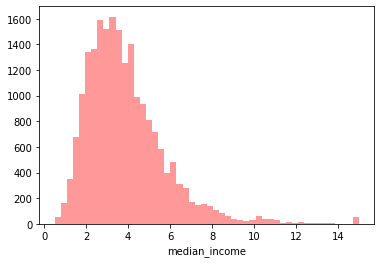

In [108]:
sns.distplot(df['median_income'],kde=False,color='r')

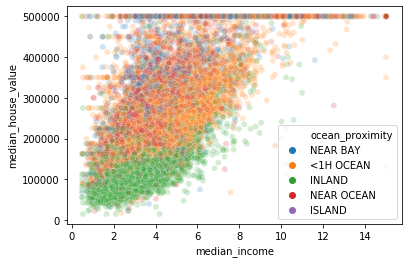

In [103]:
sns.scatterplot(x='median_income',y='median_house_value',data=df,hue='ocean_proximity',alpha=0.2)

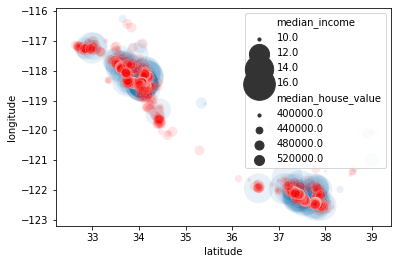

In [99]:
sns.scatterplot(x='latitude',y='longitude',data=df[df['median_income']>10],size='median_income',sizes=(10,1000),alpha=0.1)
# plt.title('income corresponding to location')
sns.scatterplot(x='latitude',y='longitude',data=df[df['median_house_value']>400000],size='median_house_value',sizes=(10,100),alpha=0.1,color='red')

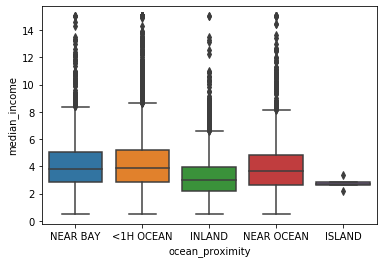

In [109]:
sns.boxplot(x='ocean_proximity',y='median_income',data=df)

# households

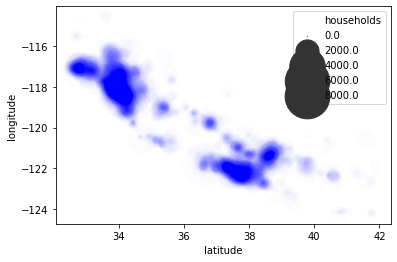

In [127]:
sns.scatterplot(x='latitude',y='longitude',data=df[df['households']>500],size='households',sizes=(0.1,2000),alpha=0.01,color='blue')

In [129]:
sum_op=df.groupby('ocean_proximity').sum()

In [130]:
sum_op

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-1085793.19,315745.43,267495.0,24012547.0,4937435.0,13889374.0,4730118.0,38651.5100,2.193410e+09
INLAND,-784370.82,240630.21,159005.0,17803933.0,3468095.0,9112744.0,3127759.0,21022.1353,8.176001e+08
ISLAND,-591.77,166.79,212.0,7873.0,2102.0,3340.0,1383.0,13.7221,1.902200e+06
NEAR BAY,-279976.99,86564.42,86402.0,5710320.0,1167195.0,2817427.0,1118931.0,9555.9061,5.935962e+08
NEAR OCEAN,-317185.93,92334.77,78005.0,6867477.0,1415482.0,3598955.0,1332308.0,10647.3760,6.629955e+08


In [133]:
average_people_in_a_house=df['population']/df['households']

In [134]:
average_people_in_a_house

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Length: 20640, dtype: float64

In [135]:
df['average_people_in_a_house']=average_people_in_a_house

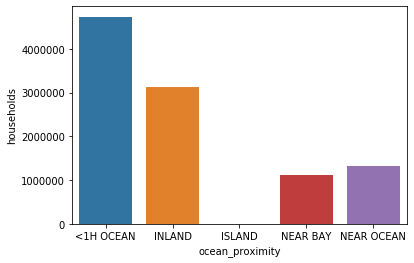

In [137]:
sns.barplot(x=sum_op.index,y='households',data=sum_op)

# house age

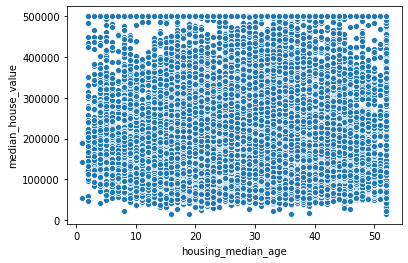

In [21]:
sns.scatterplot(y='median_house_value',x='housing_median_age',data=df)

In [78]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Text(0.5, 1.0, 'location where median house age is greater than 50')

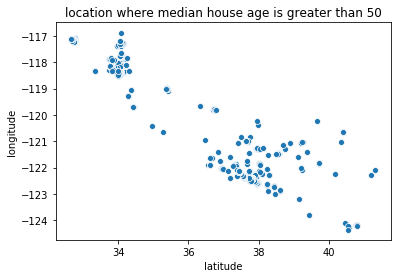

In [141]:
sns.scatterplot(x='latitude',y='longitude',data=df[df['housing_median_age']>50])
plt.title('location where median house age is greater than 50')

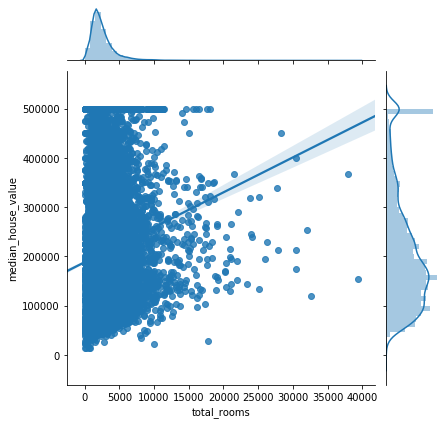

In [79]:
sns.jointplot(x='total_rooms',y='median_house_value',data=df,kind='reg')

# location 

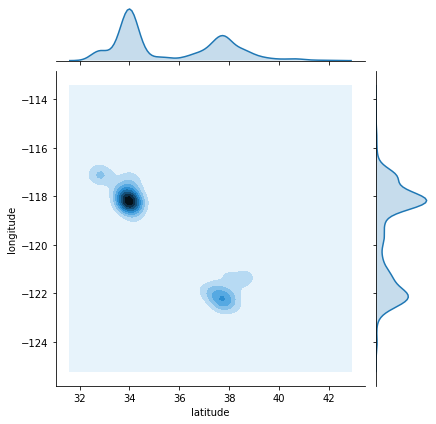

In [69]:
sns.jointplot(x='latitude',y='longitude',data=df,kind='kde')
# plt.xlabel('value corresponding to location')

Text(0.5, 1.0, 'population corresponding to location')

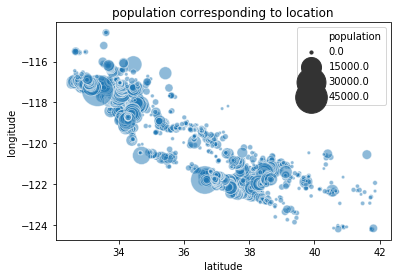

In [49]:
sns.scatterplot(x='latitude',y='longitude',data=df[df['population']>1500],size='population',sizes=(10,1000),alpha=0.5)
plt.title('population corresponding to location')

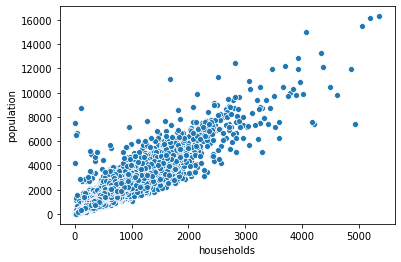

In [111]:
sns.scatterplot(x='households',y='population',data=df[df['population']<20000])